# Loading DB

In [120]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [121]:
digits = load_digits()

In [122]:
X, y = digits.data, digits.target

In [123]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [124]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [125]:
X.shape

(1797, 64)

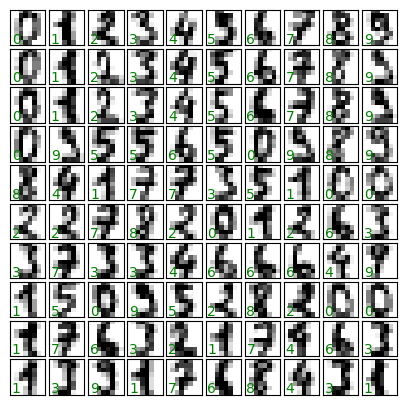

In [126]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [127]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.7, random_state=41)

# Import data
 

In [128]:
import json

# Assuming your JSON file is named 'data.json'
file_path = 'data.json'

# Load the JSON data
with open(file_path, 'r') as f:
    data = json.load(f)

# Access the data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# Convert lists to NumPy arrays
X_train = np.array(data['X_train'])
y_train = np.array(data['y_train'])
X_test = np.array(data['X_test'])
y_test = np.array(data['y_test'])

# Now you can use X_train, y_train, X_test, y_test as needed
# Example:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1257, 64)
Shape of y_train: (1257,)
Shape of X_test: (540, 64)
Shape of y_test: (540,)


# Feature Selection

In [129]:
from sklearn.feature_selection import VarianceThreshold

## P = 0.9

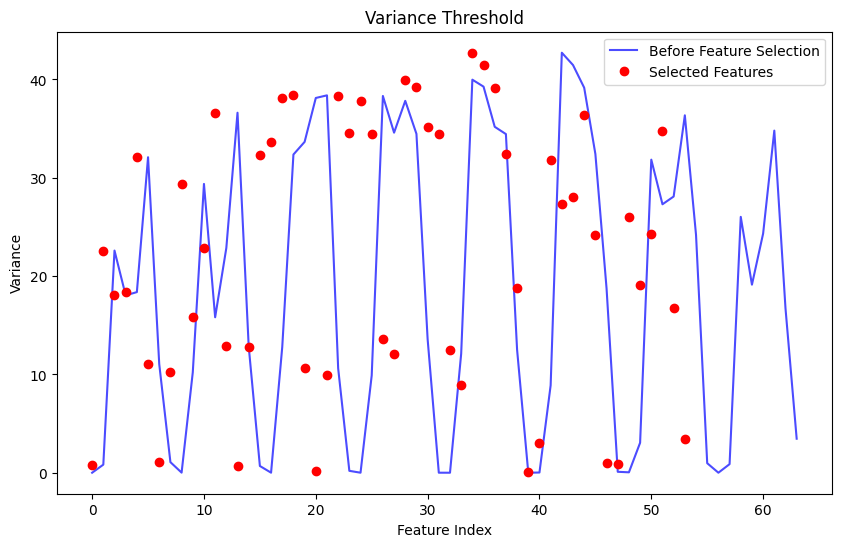

Number of selected features (VarianceThreshold): 54


In [130]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
X_fs_p90 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p90, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p90.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

## P = 0.8

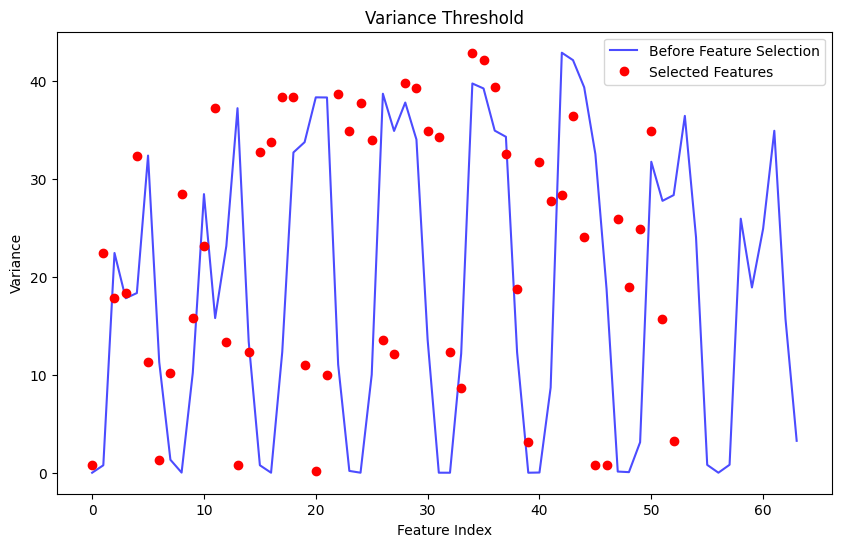

Number of selected features (VarianceThreshold): 53


In [131]:
# Calculate variances of features before feature selection
variances_before = np.var(X_train, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_fs_p80 = sel.fit_transform(X_train)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p80, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p80.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

--------------------------------------------------------------------------------------------------------------------------------------------
The graph you provided is a visualization of the variance of features before and after applying feature selection using VarianceThreshold.

The x-axis represents the feature index, and the y-axis represents the variance. The blue line shows the variance of each feature before feature selection. The red circles show the variance of the features that were selected after applying the VarianceThreshold filter.

The code you provided calculates the variance of each feature before applying the filter (variances_before) and after applying the filter (variances_after). It then plots these variances on the same graph. The threshold used for the VarianceThreshold filter is not shown in the graph, but it determines which features are considered to have low variance and are removed.

----------------------------------------------------------------------------------------------------------------------------------------------

## P = 0.7

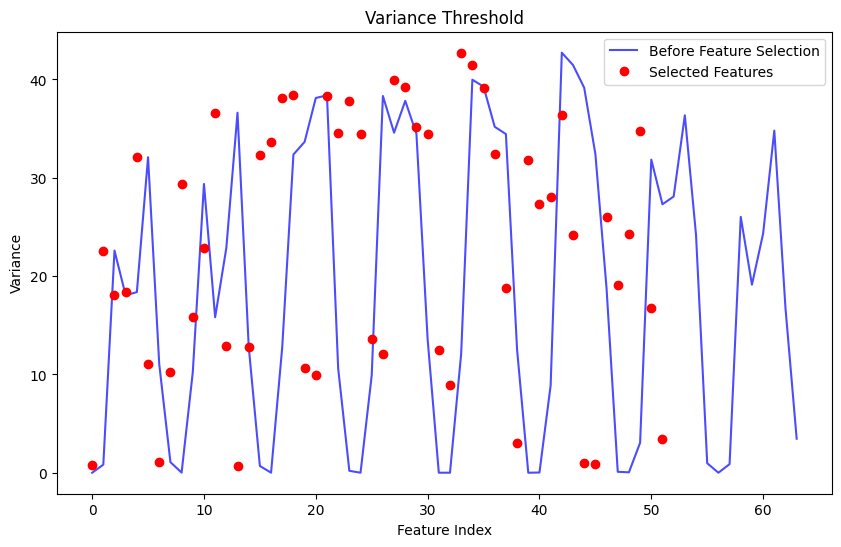

Number of selected features (VarianceThreshold): 52


In [132]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.7 * (1 - .7)))
X_fs_p70 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p70, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p70.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

## P = 0.6

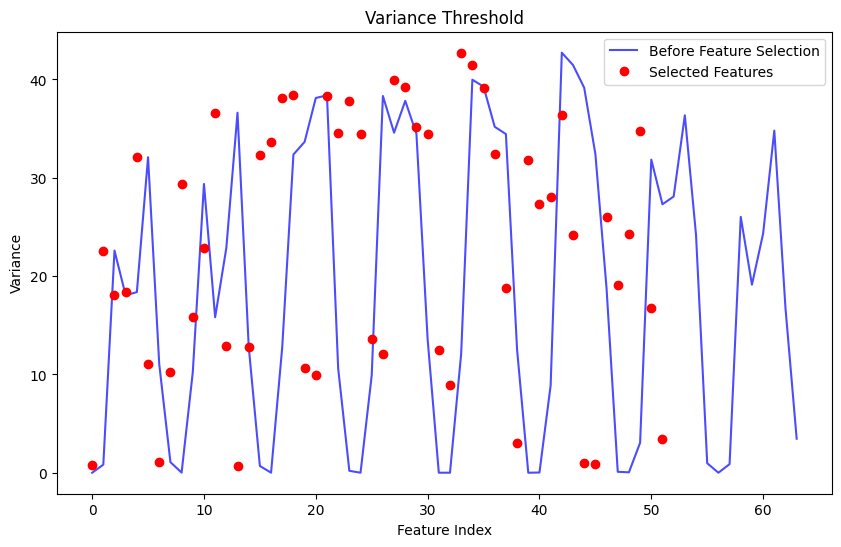

Number of selected features (VarianceThreshold): 52


In [133]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.6 * (1 - .6)))
X_fs_p60 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p60, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p60.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

## P = 0.5

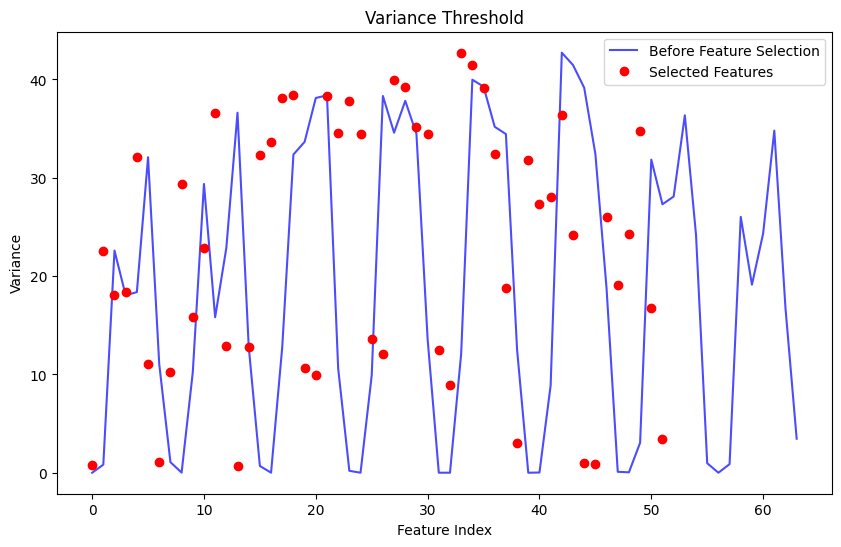

Number of selected features (VarianceThreshold): 52


In [134]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
X_fs_p50 = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_p50, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_p50.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

## Random Threshold

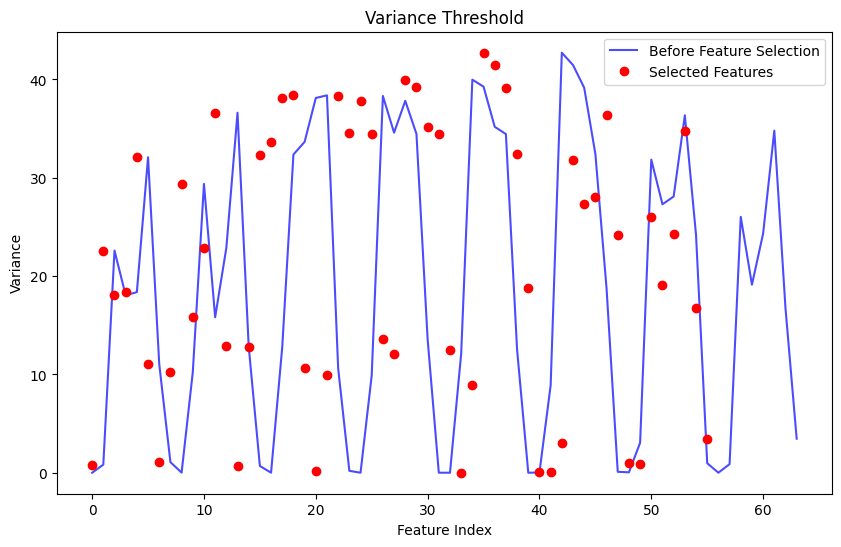

Number of selected features (VarianceThreshold): 56


In [135]:
# Calculate variances of features before feature selection
variances_before = np.var(X, axis=0)
# Apply VarianceThreshold feature selection
sel = VarianceThreshold(threshold=(0.01))
X_fs_prnd = sel.fit_transform(X)
# Calculate variances of features after feature selection
variances_after = np.var(X_fs_prnd, axis=0)
# Plot variances before and after feature selection
plt.figure(figsize=(10, 6))
plt.plot(variances_before, label='Before Feature Selection', color='blue', alpha=0.7)
plt.plot(variances_after, 'ro', label='Selected Features')
plt.title("Variance Threshold")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.legend()
plt.show()
# Print the number of selected features
num_selected_features = X_fs_prnd.shape[1]
print("Number of selected features (VarianceThreshold):", num_selected_features)

# Feature Extraction

In [136]:
from sklearn.decomposition import PCA

## P = 0.8

[2,5,7,9,10,12,15,20,30]

In [137]:
pca = PCA(n_components = 2)
X_fe_2 = pca.fit_transform(X_fs_p80)
X_fe_2.shape

(1257, 2)

In [138]:
pca = PCA(n_components = 5)
X_fe_5 = pca.fit_transform(X_fs_p80)
X_fe_5.shape

(1257, 5)

In [139]:
pca = PCA(n_components = 7)
X_fe_7 = pca.fit_transform(X_fs_p80)
X_fe_7.shape

(1257, 7)

In [140]:
pca = PCA(n_components = 9)
X_fe_9 = pca.fit_transform(X_fs_p80)
X_fe_9.shape

(1257, 9)

In [141]:
pca = PCA(n_components = 10)
X_fe_10 = pca.fit_transform(X_fs_p80)
X_fe_10.shape

(1257, 10)

In [142]:
pca = PCA(n_components = 12)
X_fe_12 = pca.fit_transform(X_fs_p80)
X_fe_12.shape

(1257, 12)

In [143]:
pca = PCA(n_components = 15)
X_fe_15 = pca.fit_transform(X_fs_p80)
X_fe_15.shape

(1257, 15)

In [144]:
pca = PCA(n_components = 20)
X_fe_20 = pca.fit_transform(X_fs_p80)
X_fe_20.shape

(1257, 20)

In [145]:
pca = PCA(n_components = 30)
X_fe_30 = pca.fit_transform(X_fs_p80)
X_fe_30.shape

(1257, 30)

# Model


In [146]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt


# Define list of numbers of components for PCA


In [147]:
num_components_list = [2, 5, 7, 9, 10, 12, 15, 20, 30]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_fs = sel.fit_transform(X_train)
X_test_fs = sel.transform(X_test)

# Store results


In [154]:
best_accuracy = 0
best_parameters = {}

# Perform the experiment 10 times


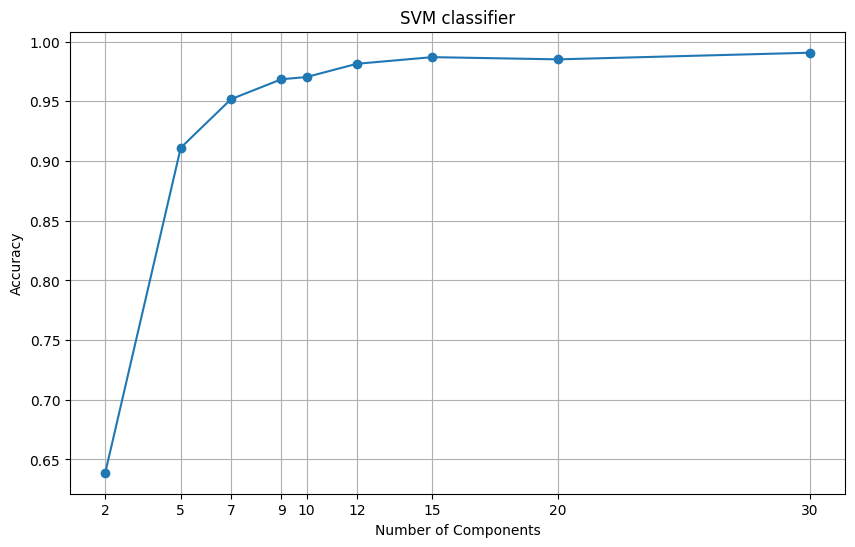

Best result:
Number of components: 30 
Best Accuracy: 0.99


In [164]:
# Perform the experiment 10 times
for _ in range(10):
    # Store accuracies for each iteration
    accuracies = []

    # Train and evaluate models with different numbers of components for PCA
    for num_components in num_components_list:
        # Feature extraction using PCA
        pca = PCA(n_components=num_components)
        X_train_fe = pca.fit_transform(X_train_fs)
        X_test_fe = pca.transform(X_test_fs)

        # Initialize Support Vector Machine classifier with random hyperparameters
        clf = SVC()

        # Train the classifier
        clf.fit(X_train_fe, y_train)

        # Make predictions
        y_pred = clf.predict(X_test_fe)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Find the best accuracy and parameters for this iteration
    max_accuracy = max(accuracies)
    if max_accuracy > best_accuracy:
        best_accuracy = max_accuracy
        best_parameters_index = accuracies.index(max_accuracy)
        best_parameters = {
            'num_components': num_components_list[best_parameters_index],
            'accuracy': best_accuracy
        }

    # Plot results for this iteration
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, accuracies, marker='o', linestyle='-')
plt.title('SVM classifier')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(num_components_list)
plt.grid(True)
plt.show()
        

# Print the best result across all iterations
print("Best result:")
print("Number of components:",best_parameters['num_components'] ,"\nBest Accuracy:", "{:.2f}".format(best_parameters['accuracy']))